# Demonstration of surrogate model capabilities

This is a simple jupyter notebook to demonstrate the autogluon surrogate model capability.

Author: Soheyl Massoudi <smassoudi@ethz.ch>

# Step 1: Load datasets

In [1]:
from datasets import load_dataset
import pandas as pd
import os

# Specify the directory and file path
csv_directory = "./data"
csv_file_name = "airfoil_data.csv"
csv_path = os.path.join(csv_directory, csv_file_name)
absolute_csv_path = os.path.abspath(csv_path)

# Create the directory if it doesn't exist
os.makedirs(csv_directory, exist_ok=True)

# Load dataset from Hugging Face
dataset = load_dataset("IDEALLab/airfoil_2d_v0", split="train")

# Convert to pandas DataFrame
df = pd.DataFrame(dataset)

# Save to CSV
df.to_csv(absolute_csv_path, index=False)

print(f"Dataset saved to {csv_path}")



/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset saved to ./data/airfoil_data.csv


## Step 2: Load surrogate model from engiopt

In [4]:
import sys
import os

# Add the path to the directory containing your AutoGluon script
sys.path.append(os.path.abspath("../EngiOpt/engiopt"))

# Now you can import and use the script as if it's in the same directory
#from autogluon_multimodal import main


!python ../EngiOpt/engiopt/autogluon_multimodal.py \
  --modality "tabular" \
  --train_data_path "../Engibench/data/airfoil_data.csv" \
  --label "cl_val" \
  --track "False" \
  --time_limit 3600 \
  --presets "high_quality" \
  --seed 42 \
  --save_model "True"



../Engibench/data/airfoil_data.csv
No path specified. Models will be saved in: "AutogluonModels/ag-20250206_213018"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:24 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6030
CPU Count:          11
Memory Avail:       14.62 GB / 36.00 GB (40.6%)
Disk Space Avail:   564.29 GB / 926.35 GB (60.9%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the 

In [28]:
problem = airfoil2d_v0.build()
problem.reset(99)

u22-gcc-ompi-stable: Pulling from mdolab/public
Digest: sha256:8a2349b7a2587b3317ad09b6a8096f615cc4c4283f43879e897e3ad53e830cd9
Status: Image is up to date for mdolab/public:u22-gcc-ompi-stable
docker.io/mdolab/public:u22-gcc-ompi-stable
Creating study directory: /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d/study_99
Copying files from /Users/ffelte/Documents/EngiBench/engibench/problems/airfoil2d/templates to /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d/study_99
Creating study directory: /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d
Copying files from /Users/ffelte/Documents/EngiBench/engibench/problems/airfoil2d/scripts to /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d



What's Next?
  View a summary of image vulnerabilities and recommendations → docker scout quickview mdolab/public:u22-gcc-ompi-stable


## Step 2: Inspect the Problem

### 2.1: Representation, Objectives, Boundary Conditions
The output just below means our airfoil is parameterized by 192 (`x, y`) positions in `[0, 1]`.

In [22]:
problem.design_space

Box(0.0, 1.0, (2, 192), float32)

In [23]:
problem.possible_objectives

frozenset({('cd', 'minimize'), ('cl', 'maximize')})

In [24]:
problem.boundary_conditions

frozenset({('marchDist', 100.0), ('s0', 3e-06)})

### 2.2 Data
We can directly access [the dataset linked to the problem](https://huggingface.co/datasets/IDEALLab/airfoil_2d_v0) doing the following:

In [25]:
problem.dataset

DatasetDict({
    train: Dataset({
        features: ['initial', 'optimized', 'mach', 'reynolds', 'cl_target', 'area_target', 'alpha', 'area_initial', 'cd_val', 'cl_val', 'cl_con', 'area_con'],
        num_rows: 748
    })
    val: Dataset({
        features: ['initial', 'optimized', 'mach', 'reynolds', 'cl_target', 'area_target', 'alpha', 'area_initial', 'cd_val', 'cl_val', 'cl_con', 'area_con'],
        num_rows: 140
    })
    test: Dataset({
        features: ['initial', 'optimized', 'mach', 'reynolds', 'cl_target', 'area_target', 'alpha', 'area_initial', 'cd_val', 'cl_val', 'cl_con', 'area_con'],
        num_rows: 47
    })
})

## Step 3: Creating a Design and Launching the Simulator
While you usually would generate a design based on a generative or surrogate mode, we here show how to play with a rather random one.

In [ ]:
my_design = problem.random_design()
my_design

You can also render designs to see what they look like.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

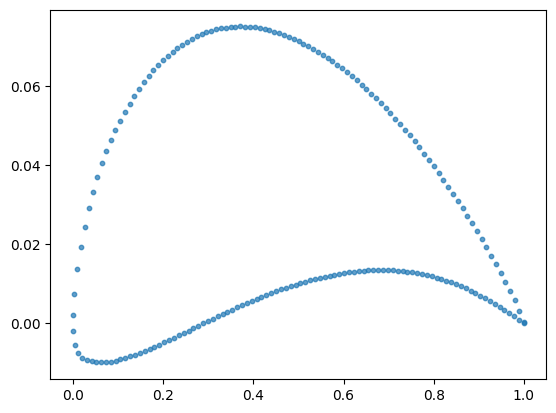

In [27]:
problem.render(my_design)

Finally, you can:
- Simulate a design to get its objective values with `objs = problem.simulate(my_design)`
- Optimize a given design with `optimal_design, objs = problem.optimize(my_design)`

Note that this is not trivially doable here since the simulation requires launching a container 😅.